In [1]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [3]:
sms = [line for line in open('/Users/victornneji/Documents/Data Science with Python/Course_Material/S_18_NLP/smsspamcollection/SMSSpamCollection')]

In [4]:
len(sms), type(sms)

(5574, list)

In [5]:
sms[1]

'ham\tOk lar... Joking wif u oni...\n'

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('/Users/victornneji/Documents/Data Science with Python/Course_Material/S_18_NLP/smsspamcollection/SMSSpamCollection', sep='\t', names = ['target', 'sms'])

In [8]:
df.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df.describe()

,target,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
df.groupby(by = 'target').describe()

sms                                                               
       count unique                                                top freq
target                                                                     
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

In [12]:
df['length'] = df['sms'].apply(len)

In [13]:
df.head()

,target,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

/var/folders/b6/l1n962ss59n521_0vxpckrcr0000gn/T/ipykernel_7521/1196367930.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['length'])


<Axes: xlabel='length', ylabel='Density'>

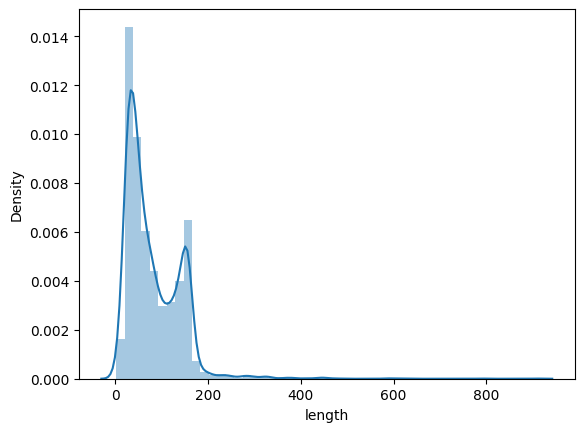

In [15]:
sns.distplot(df['length'])

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

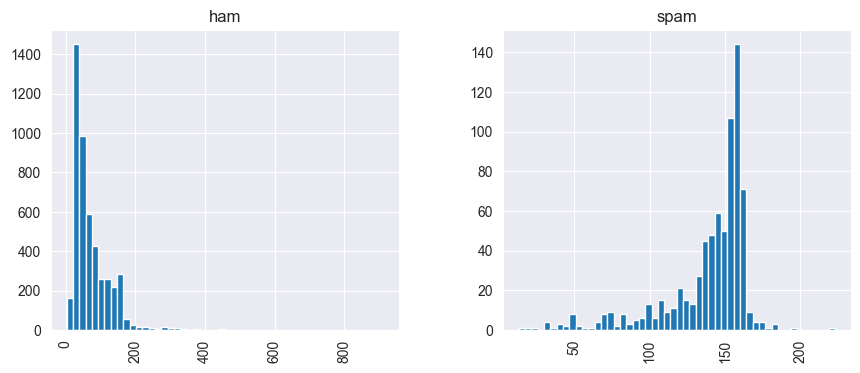

In [16]:
sns.set_style('darkgrid')
df.hist(column = 'length', bins = 50, by = 'target', figsize = (10,4))

In [17]:
###Remove Punctuations
import string

In [18]:
s = 'is this a sample message: if yes, remove punctuations.'

In [19]:
s

'is this a sample message: if yes, remove punctuations.'

In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
npunc = [char for char in s if char not in string.punctuation]

In [22]:
npunc[0:10]

['i', 's', ' ', 't', 'h', 'i', 's', ' ', 'a', ' ']

In [23]:
npunc = ''.join(npunc)

In [24]:
npunc

'is this a sample message if yes remove punctuations'

In [25]:
##Remove stopwords
from nltk.corpus import stopwords

In [26]:
stopwords.words('english')[0:5]

['i', 'me', 'my', 'myself', 'we']

In [27]:
clean_s = [word for word in npunc.split() if word.lower() not in stopwords.words('english')]

In [28]:
clean_s

['sample', 'message', 'yes', 'remove', 'punctuations']

In [29]:
def process_text(raw_text):
    #check for punctuations
    npunc = [char for char in raw_text if char not in string.punctuation]
    #join the characters
    npunc = ''.join(npunc)
    #remove stopwords
    clean_s = [word for word in npunc.split() if word.lower() not in stopwords.words('english')]
    return clean_s


In [30]:
df['sms'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: sms, dtype: object

In [31]:
df['sms'].apply(process_text)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, £750, Pou...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: sms, Length: 5572, dtype: object

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
bow_transformer = CountVectorizer(analyzer=process_text).fit(df['sms'])

In [34]:
len(bow_transformer.vocabulary_)

11425

In [35]:
bow_transformer.vocabulary_.get('way')

10979

In [36]:
sms_18 = df['sms'][18]
sms_18

'Fine if that\x92s the way u feel. That\x92s the way its gota b'

In [37]:
bow_18 = bow_transformer.transform([sms_18])

In [38]:
print(bow_18)
print(bow_18.shape)

  (0, 1914)	1
  (0, 3964)	1
  (0, 4880)	1
  (0, 6517)	1
  (0, 6907)	1
  (0, 10405)	1
  (0, 10698)	1
  (0, 10979)	2
(1, 11425)


In [42]:
print(bow_transformer.get_feature_names_out()[10979])

way


In [43]:
df_bow = bow_transformer.transform(df['sms'])

In [45]:
df_bow.shape

(5572, 11425)

In [46]:
df_bow.nnz

50548

In [47]:
total_el = df_bow.shape[0]*df_bow.shape[1]
total_el

63660100

In [49]:
sparcity = (df_bow.nnz/total_el)*100
sparcity

0.07940295412668218

In [50]:
from sklearn.feature_extraction.text import TfidfTransformer

In [51]:
tfidf_trans = TfidfTransformer()

In [52]:
tfidf_trans.fit(df_bow)

TfidfTransformer()

In [53]:
tfidf_18 = tfidf_trans.transform(bow_18)

In [55]:
print(tfidf_18)

  (0, 10979)	0.4614287912715437
  (0, 10698)	0.14951677306049
  (0, 10405)	0.407177880883951
  (0, 6907)	0.407177880883951
  (0, 6517)	0.25779365112759217
  (0, 4880)	0.2595470847416778
  (0, 3964)	0.407177880883951
  (0, 1914)	0.3654100017189274


In [58]:
tfidf_trans.idf_[bow_transformer.vocabulary_['way']]

5.0613405961017

In [60]:
df_tfidf = tfidf_trans.transform(df_bow)

In [61]:
df_tfidf.shape

(5572, 11425)

In [62]:
from sklearn.naive_bayes import MultinomialNB

In [63]:
spam_ham_detection = MultinomialNB()

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X = df_tfidf
y = df['target']

In [66]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.33, random_state=42)

In [67]:
spam_ham_detection.fit(X_train, y_train)

MultinomialNB()

In [68]:
pred = spam_ham_detection.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1593    0]
 [  71  175]]
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1593
        spam       1.00      0.71      0.83       246

    accuracy                           0.96      1839
   macro avg       0.98      0.86      0.90      1839
weighted avg       0.96      0.96      0.96      1839



In [70]:
X = df['sms']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.33, random_state=42)

In [71]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    #Tokenization using sklearn CountVectorizer
    ('bow', CountVectorizer(analyzer = process_text)),
    #Compute Tf_Idf weighted scores
    ('tfidf', TfidfTransformer()),
    #naive Bayes Classifier to train on f-Idf vectors
    ('nb_model', MultinomialNB())
])
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1593    0]
 [  65  181]]
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1593
        spam       1.00      0.74      0.85       246

    accuracy                           0.96      1839
   macro avg       0.98      0.87      0.91      1839
weighted avg       0.97      0.96      0.96      1839



In [72]:
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    #Tokenization using sklearn CountVectorizer
    ('bow', CountVectorizer(analyzer = process_text)),
    #Compute Tf_Idf weighted scores
    ('tfidf', TfidfTransformer()),
    #naive Bayes Classifier to train on f-Idf vectors
    ('model', LogisticRegression())
])
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1589    4]
 [  91  155]]
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1593
        spam       0.97      0.63      0.77       246

    accuracy                           0.95      1839
   macro avg       0.96      0.81      0.87      1839
weighted avg       0.95      0.95      0.94      1839



In [74]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    #Tokenization using sklearn CountVectorizer
    ('bow', CountVectorizer(analyzer = process_text)),
    #Compute Tf_Idf weighted scores
    ('tfidf', TfidfTransformer()),
    #naive Bayes Classifier to train on f-Idf vectors
    ('model', RandomForestClassifier())
])
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1593    0]
 [  45  201]]
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1593
        spam       1.00      0.82      0.90       246

    accuracy                           0.98      1839
   macro avg       0.99      0.91      0.94      1839
weighted avg       0.98      0.98      0.97      1839

